In [ ]:
# 任务1
# 使用python编程读取json文件，获取双色球每期的蓝球开奖数据，并以csv格式保存到blue.csv中，文件至少要有两列数据：期数、蓝球号码。

In [1]:
import matplotlib
import json
import csv
import os
import chardet
import pandas as pd
import matplotlib.pyplot as plt
# 手动设置字体，替换为系统中支持中文的字体
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
matplotlib.rcParams['axes.unicode_minus'] = False   # 解决负号显示问题
# File paths
csv_file_path = 'blue.csv'

# 加载数据
def load_json_file(file_path):
    with open(file_path, 'rb') as file:
        raw_data = file.read()
        result = chardet.detect(raw_data)
        encoding = result['encoding']
        return json.loads(raw_data.decode(encoding))

blue_ball_data = []

for i in range(1, 15):
    json_file_path = f'data/{i}.json'
    if os.path.exists(json_file_path):
        try:
            data = load_json_file(json_file_path)
            # Extract blue ball data
            for result in data.get("result", []):
                blue_ball_data.append({
                    "期数": result["code"],
                    "蓝球号码": result["blue"]
                })
        except Exception as e:
            print(f"Error reading {json_file_path}: {e}")

# 保存蓝色球文件
with open(csv_file_path, 'w', newline='', encoding='utf-8') as csv_file:
    writer = csv.DictWriter(csv_file, fieldnames=["期数", "蓝球号码"])
    writer.writeheader()
    writer.writerows(blue_ball_data)


In [2]:
# 任务2：使用python编程读取blue.csv文件，统计数据z红每个蓝球号码出现过的次数，并画出蓝球号码的走势图。

实验结果如图：


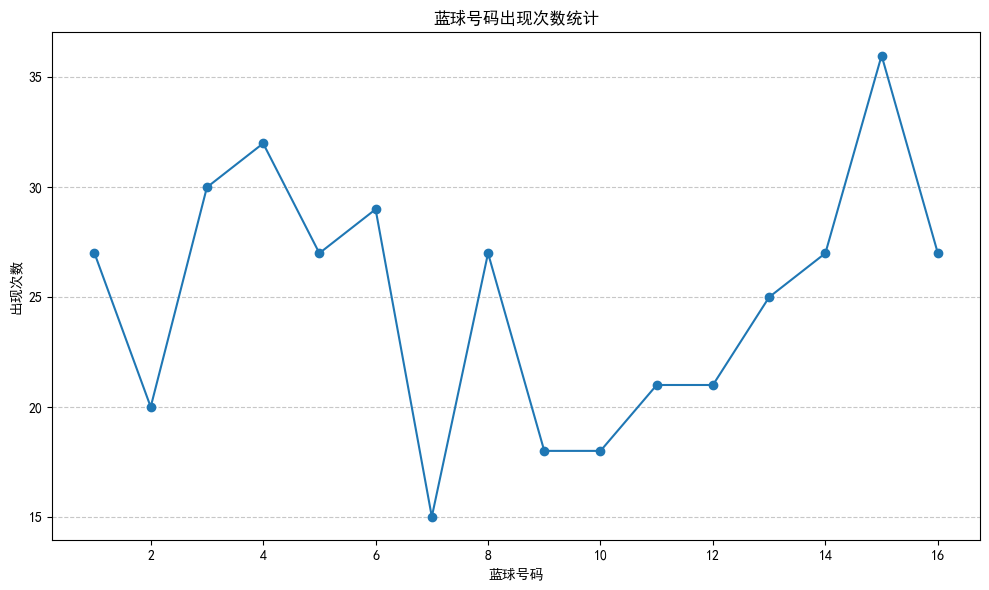

CSV 文件已保存为: blue.csv
折线图已保存为: blue_ball_line_trend.png


In [3]:

# 读取蓝色球文件
df = pd.read_csv(csv_file_path)


blue_count = df['蓝球号码'].value_counts().sort_index()

# 制作走势图
plt.figure(figsize=(10, 6))
blue_count.sort_index().plot(kind='line', marker='o')

plt.title('蓝球号码出现次数统计')
plt.xlabel('蓝球号码')
plt.ylabel('出现次数')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the plot as a PNG file
plot_path = 'blue_ball_line_trend.png'
plt.savefig(plot_path)
print("实验结果如图：")
plt.show()

print(f"CSV 文件已保存为: {csv_file_path}")
print(f"折线图已保存为: {plot_path}")
